In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import os

In [71]:
input_folder = 'D:\Coding\Machine Learning\AQI\semi-final imputed data'

In [72]:
pd.set_option('display.max_columns', None)

In [73]:
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

In [74]:
stations = {
    0: "alipur",
    1: "anand vihar",
    2: "ashok vihar",
    3: "aya nagar",
    4: "bawanar",
    5: "burari crossing",
    6: "chandni chowk",
    7: "crri mathura road",
    8: "dkssr",
    9: "dtu",
    10: "dwarka sector 8",
    11: "igi airport t3",
    12: "ihbas dilshad garden",
    13: "ito",
    14: "jahangirpuri",
    15: "jawaharlal nehru stadium",
    16: "lodhi road iitm",
    17: "lodhi road imd",
    18: "mandir marg",
    19: "mdcns",
    20: "mundka",
    21: "najafgarh",
    22: "narela",
    23: "nehru nagar",
    24: "new moti bagh",
    25: "north campus DU",
    26: "nsit dwarka",
    27: "okhla phase 2",
    28: "patparganj",
    29: "punjabi bagh",
    30: "pusa dpcc",
    31: "pusa imd",
    32: "rk puram",
    33: "rohini",
    34: "shadipur",
    35: "siriffort",
    36: "sonia vihar",
    37: "sri aurobindo marg",
    38: "vivek-vihar",
    39: "wazirpur"
}

In [75]:
dataframes = {}

# Loop through each CSV file and read it into a DataFrame
for i, csv_file in enumerate(csv_files):
    file_path = os.path.join(input_folder, csv_file)
    df = pd.read_csv(file_path)
    # Store the DataFrame in the dictionary with a unique name
    dataframes[f"df_{i}"] = df
    print(csv_file)

imputed_Alipur.csv
imputed_Anand Vihar.csv
imputed_Ashok Vihar.csv
imputed_Aya Nagar.csv
imputed_Bawanar.csv
imputed_Burari Crossing.csv
imputed_Chandni Chowk.csv
imputed_CRRI Mathura Road.csv
imputed_DKSSR.csv
imputed_DTU.csv
imputed_Dwarka Sector-8.csv
imputed_IGI Airport T3.csv
imputed_IHBAS Dilshad Garden.csv
imputed_ITO.csv
imputed_Jahangirpuri.csv
imputed_Jawaharlal Nehru Stadium.csv
imputed_Lodhi Road-IITM.csv
imputed_Lodhi Road-IMD.csv
imputed_Mandir Marg.csv
imputed_MDCNS.csv
imputed_Mundka.csv
imputed_Najafgarh.csv
imputed_Narela.csv
imputed_Nehru Nagar.csv
imputed_New Moti Bagh.csv
imputed_North Campus, DU.csv
imputed_NSIT Dwarka.csv
imputed_Okhla Phase-2.csv
imputed_Patparganj.csv
imputed_Punjabi Bagh.csv
imputed_Pusa-DPCC.csv
imputed_Pusa-IMD.csv
imputed_RK Puram.csv
imputed_Rohini.csv
imputed_Shadipur.csv
imputed_Siriffort.csv
imputed_Sonia Vihar.csv
imputed_Sri Aurobindo Marg.csv
imputed_Vivek Vihar.csv
imputed_Wazirpur.csv


In [76]:
dataframes["df_0"] # alipur

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Xylene (µg/m³),O Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2018-11-11 14:00:00,130.00,274.0,1.700,54.000,30.100,48.66302,26.400,0.800000,19.536895,3.400,15.300,0.100,0.0,0.0,0.0,29.60,31.800,0.0,272.600,0.0,0.0,214.100,991.200,0.0
1,2019-01-01 00:00:00,361.50,525.5,119.850,156.900,181.050,62.50000,18.130,3.880000,1.400000,6.080,104.150,7.750,0.0,0.0,0.0,7.00,95.050,0.0,79.620,0.0,0.0,4.570,997.670,0.0
2,2019-01-01 01:00:00,348.00,514.0,149.950,142.120,197.850,57.52000,19.170,2.450000,1.700000,9.930,136.100,21.170,0.0,0.0,0.0,6.43,96.480,0.0,67.000,0.0,0.0,4.570,997.570,0.0
3,2019-01-01 02:00:00,298.00,466.5,72.800,121.450,123.900,52.55000,15.000,1.800000,6.420000,9.970,102.730,21.280,0.0,0.0,0.0,6.68,97.650,0.0,53.350,0.0,0.0,4.620,997.450,0.0
4,2019-01-01 03:00:00,276.50,429.5,62.600,113.480,111.380,53.95000,14.270,1.700000,9.980000,8.700,79.850,14.800,0.0,0.0,0.0,6.15,98.200,0.0,55.630,0.0,0.0,4.620,997.050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2023-12-31 19:00:00,166.75,207.0,1.900,27.400,16.100,29.92500,4.825,1.266667,32.500000,3.000,5.125,0.500,0.0,0.0,0.0,8.20,75.275,0.0,41.825,0.0,0.0,3.875,973.800,0.0
43821,2023-12-31 20:00:00,174.50,226.0,1.575,26.950,15.625,29.25000,4.350,1.225000,32.350000,3.100,6.175,0.575,0.0,0.0,0.0,8.20,75.000,0.0,76.575,0.0,0.0,3.850,973.800,0.0
43822,2023-12-31 21:00:00,158.25,213.0,1.850,22.975,13.750,28.62500,4.675,1.150000,26.925000,3.025,4.850,0.475,0.0,0.0,0.0,8.20,74.975,0.0,44.075,0.0,0.0,3.875,973.775,0.0
43823,2023-12-31 22:00:00,139.25,189.0,2.175,18.300,11.500,28.22500,4.800,1.000000,22.125000,2.600,4.025,0.375,0.0,0.0,0.0,8.20,75.600,0.0,24.800,0.0,0.0,3.875,973.800,0.0


In [77]:
copied_df = {}

In [78]:
for i in stations:   
    copied_df[i] = dataframes[f"df_{i}"].copy()

In [79]:
copied_df[0]  # alipur

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Xylene (µg/m³),O Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2018-11-11 14:00:00,130.00,274.0,1.700,54.000,30.100,48.66302,26.400,0.800000,19.536895,3.400,15.300,0.100,0.0,0.0,0.0,29.60,31.800,0.0,272.600,0.0,0.0,214.100,991.200,0.0
1,2019-01-01 00:00:00,361.50,525.5,119.850,156.900,181.050,62.50000,18.130,3.880000,1.400000,6.080,104.150,7.750,0.0,0.0,0.0,7.00,95.050,0.0,79.620,0.0,0.0,4.570,997.670,0.0
2,2019-01-01 01:00:00,348.00,514.0,149.950,142.120,197.850,57.52000,19.170,2.450000,1.700000,9.930,136.100,21.170,0.0,0.0,0.0,6.43,96.480,0.0,67.000,0.0,0.0,4.570,997.570,0.0
3,2019-01-01 02:00:00,298.00,466.5,72.800,121.450,123.900,52.55000,15.000,1.800000,6.420000,9.970,102.730,21.280,0.0,0.0,0.0,6.68,97.650,0.0,53.350,0.0,0.0,4.620,997.450,0.0
4,2019-01-01 03:00:00,276.50,429.5,62.600,113.480,111.380,53.95000,14.270,1.700000,9.980000,8.700,79.850,14.800,0.0,0.0,0.0,6.15,98.200,0.0,55.630,0.0,0.0,4.620,997.050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2023-12-31 19:00:00,166.75,207.0,1.900,27.400,16.100,29.92500,4.825,1.266667,32.500000,3.000,5.125,0.500,0.0,0.0,0.0,8.20,75.275,0.0,41.825,0.0,0.0,3.875,973.800,0.0
43821,2023-12-31 20:00:00,174.50,226.0,1.575,26.950,15.625,29.25000,4.350,1.225000,32.350000,3.100,6.175,0.575,0.0,0.0,0.0,8.20,75.000,0.0,76.575,0.0,0.0,3.850,973.800,0.0
43822,2023-12-31 21:00:00,158.25,213.0,1.850,22.975,13.750,28.62500,4.675,1.150000,26.925000,3.025,4.850,0.475,0.0,0.0,0.0,8.20,74.975,0.0,44.075,0.0,0.0,3.875,973.775,0.0
43823,2023-12-31 22:00:00,139.25,189.0,2.175,18.300,11.500,28.22500,4.800,1.000000,22.125000,2.600,4.025,0.375,0.0,0.0,0.0,8.20,75.600,0.0,24.800,0.0,0.0,3.875,973.800,0.0


In [80]:
missing_values_sum = {}

In [81]:
for i, station in stations.items():
    missing_values_sum[f"station"] = copied_df[i].isnull().sum().sum()

missing_values_sum

{'station': 0}

In [82]:
def sub_index_calculations(df):
    calculations = {
        "PM10_24hr_avg": ("PM10 (µg/m³)", 24, 'mean'),
        "PM2.5_24hr_avg": ("PM2.5 (µg/m³)", 24, 'mean'),
        "SO2_24hr_avg": ("SO2 (µg/m³)", 24, 'mean'),
        "NO2_24hr_avg": ("NO2 (µg/m³)", 24, 'mean'), 
        "NOx_24hr_avg": ("NOx (ppb)", 24, 'mean'),
        "NH3_24hr_avg": ("NH3 (µg/m³)", 24, 'mean'),
        "CO_8hr_max": ("CO (mg/m³)", 8, 'max'),
        "O3_8hr_max": ("Ozone (µg/m³)", 8, 'max')
    }

    # Apply the calculations
    for new_col, (source_col, window, operation) in calculations.items():
        if source_col in df.columns:
            if operation == 'mean':
                df[new_col] = df[source_col].rolling(window=window, min_periods=0).mean().values
            elif operation == 'max':
                df[new_col] = df[source_col].rolling(window=window, min_periods=0).max().values

In [83]:
for i in stations:
    sub_index_calculations(copied_df[i])

In [84]:
copied_df[0]

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Xylene (µg/m³),O Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s),PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max
0,2018-11-11 14:00:00,130.00,274.0,1.700,54.000,30.100,48.66302,26.400,0.800000,19.536895,3.400,15.300,0.100,0.0,0.0,0.0,29.60,31.800,0.0,272.600,0.0,0.0,214.100,991.200,0.0,274.000000,130.000000,26.400000,54.000000,30.100000,48.663020,0.80,19.536895
1,2019-01-01 00:00:00,361.50,525.5,119.850,156.900,181.050,62.50000,18.130,3.880000,1.400000,6.080,104.150,7.750,0.0,0.0,0.0,7.00,95.050,0.0,79.620,0.0,0.0,4.570,997.670,0.0,399.750000,245.750000,22.265000,105.450000,105.575000,55.581510,3.88,19.536895
2,2019-01-01 01:00:00,348.00,514.0,149.950,142.120,197.850,57.52000,19.170,2.450000,1.700000,9.930,136.100,21.170,0.0,0.0,0.0,6.43,96.480,0.0,67.000,0.0,0.0,4.570,997.570,0.0,437.833333,279.833333,21.233333,117.673333,136.333333,56.227673,3.88,19.536895
3,2019-01-01 02:00:00,298.00,466.5,72.800,121.450,123.900,52.55000,15.000,1.800000,6.420000,9.970,102.730,21.280,0.0,0.0,0.0,6.68,97.650,0.0,53.350,0.0,0.0,4.620,997.450,0.0,445.000000,284.375000,19.675000,118.617500,133.225000,55.308255,3.88,19.536895
4,2019-01-01 03:00:00,276.50,429.5,62.600,113.480,111.380,53.95000,14.270,1.700000,9.980000,8.700,79.850,14.800,0.0,0.0,0.0,6.15,98.200,0.0,55.630,0.0,0.0,4.620,997.050,0.0,441.900000,282.800000,18.594000,117.590000,128.856000,55.036604,3.88,19.536895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2023-12-31 19:00:00,166.75,207.0,1.900,27.400,16.100,29.92500,4.825,1.266667,32.500000,3.000,5.125,0.500,0.0,0.0,0.0,8.20,75.275,0.0,41.825,0.0,0.0,3.875,973.800,0.0,206.479167,155.836806,6.395139,28.643750,17.309375,33.203819,1.50,41.100000
43821,2023-12-31 20:00:00,174.50,226.0,1.575,26.950,15.625,29.25000,4.350,1.225000,32.350000,3.100,6.175,0.575,0.0,0.0,0.0,8.20,75.000,0.0,76.575,0.0,0.0,3.850,973.800,0.0,205.489583,154.732639,6.295139,28.496875,17.220833,32.834028,1.50,41.100000
43822,2023-12-31 21:00:00,158.25,213.0,1.850,22.975,13.750,28.62500,4.675,1.150000,26.925000,3.025,4.850,0.475,0.0,0.0,0.0,8.20,74.975,0.0,44.075,0.0,0.0,3.875,973.775,0.0,204.291667,153.107639,6.215972,28.289583,17.104167,32.496528,1.50,41.100000
43823,2023-12-31 22:00:00,139.25,189.0,2.175,18.300,11.500,28.22500,4.800,1.000000,22.125000,2.600,4.025,0.375,0.0,0.0,0.0,8.20,75.600,0.0,24.800,0.0,0.0,3.875,973.800,0.0,202.677083,151.253472,6.146528,27.969792,16.946875,32.164236,1.50,41.100000


In [85]:
# to calculate PM2.5 sub-index
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

# Function to apply the PM2.5 sub-index calculation with column check
def apply_pm25_subindex(df):
    if "PM2.5_24hr_avg" in df.columns:
        df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_pm25_subindex(copied_df[station])
# apply_pm25_subindex(copied_df_15[0])

In [86]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

def apply_pm10_subindex(df):
    if "PM10_24hr_avg" in df.columns:
        df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_pm10_subindex(copied_df[station])
# apply_pm10_subindex(copied_df_15[0])

In [87]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

def apply_so2_subindex(df):
    if "SO2_24hr_avg" in df.columns:
        df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_so2_subindex(copied_df[station])
# apply_so2_subindex(copied_df_15[0])

In [88]:
## NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

def apply_no2_subindex(df):
    if "NO2_24hr_avg" in df.columns:
        df["NO2_SubIndex"] = df["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_no2_subindex(copied_df[station])
# apply_no2_subindex(copied_df_15[0])

In [89]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

def apply_nox_subindex(df):
    if "NOx_24hr_avg" in df.columns:
        df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_nox_subindex(copied_df[station])
# apply_nox_subindex(copied_df_15[0])

In [90]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

def apply_nh3_subindex(df):
    if "NH3_24hr_avg" in df.columns:
        df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_nh3_subindex(copied_df[station])
# apply_nh3_subindex(copied_df_15[0])

In [91]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

def apply_o3_subindex(df):
    if "O3_8hr_max" in df.columns:
        df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_o3_subindex(copied_df[station])
# apply_o3_subindex(copied_df_15[0])

In [92]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

def apply_co_subindex(df):
    if "CO_8hr_max" in df.columns:
        df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

# Apply the function to each DataFrame in the dictionary
for station in stations:
    apply_co_subindex(copied_df[station])
# apply_co_subindex(copied_df_15[0])

In [93]:
for i, station_name in stations.items():
    print(f'index = {i}, station name = {station_name}')

index = 0, station name = alipur
index = 1, station name = anand vihar
index = 2, station name = ashok vihar
index = 3, station name = aya nagar
index = 4, station name = bawanar
index = 5, station name = burari crossing
index = 6, station name = chandni chowk
index = 7, station name = crri mathura road
index = 8, station name = dkssr
index = 9, station name = dtu
index = 10, station name = dwarka sector 8
index = 11, station name = igi airport t3
index = 12, station name = ihbas dilshad garden
index = 13, station name = ito
index = 14, station name = jahangirpuri
index = 15, station name = jawaharlal nehru stadium
index = 16, station name = lodhi road iitm
index = 17, station name = lodhi road imd
index = 18, station name = mandir marg
index = 19, station name = mdcns
index = 20, station name = mundka
index = 21, station name = najafgarh
index = 22, station name = narela
index = 23, station name = nehru nagar
index = 24, station name = new moti bagh
index = 25, station name = north ca

In [94]:
copied_df[0]

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Xylene (µg/m³),O Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s),PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,NOx_SubIndex,NH3_SubIndex,O3_SubIndex,CO_SubIndex
0,2018-11-11 14:00:00,130.00,274.0,1.700,54.000,30.100,48.66302,26.400,0.800000,19.536895,3.400,15.300,0.100,0.0,0.0,0.0,29.60,31.800,0.0,272.600,0.0,0.0,214.100,991.200,0.0,274.000000,130.000000,26.400000,54.000000,30.100000,48.663020,0.80,19.536895,307.692308,224.000000,33.000000,67.500000,37.625000,12.165755,19.536895,40.0
1,2019-01-01 00:00:00,361.50,525.5,119.850,156.900,181.050,62.50000,18.130,3.880000,1.400000,6.080,104.150,7.750,0.0,0.0,0.0,7.00,95.050,0.0,79.620,0.0,0.0,4.570,997.670,0.0,399.750000,245.750000,22.265000,105.450000,105.575000,55.581510,3.88,19.536895,396.730769,362.187500,27.831250,125.450000,125.575000,13.895377,19.536895,123.5
2,2019-01-01 01:00:00,348.00,514.0,149.950,142.120,197.850,57.52000,19.170,2.450000,1.700000,9.930,136.100,21.170,0.0,0.0,0.0,6.43,96.480,0.0,67.000,0.0,0.0,4.570,997.570,0.0,437.833333,279.833333,21.233333,117.673333,136.333333,56.227673,3.88,19.536895,422.948718,409.791667,26.541667,137.673333,156.333333,14.056918,19.536895,123.5
3,2019-01-01 02:00:00,298.00,466.5,72.800,121.450,123.900,52.55000,15.000,1.800000,6.420000,9.970,102.730,21.280,0.0,0.0,0.0,6.68,97.650,0.0,53.350,0.0,0.0,4.620,997.450,0.0,445.000000,284.375000,19.675000,118.617500,133.225000,55.308255,3.88,19.536895,426.442308,418.750000,24.593750,138.617500,153.225000,13.827064,19.536895,123.5
4,2019-01-01 03:00:00,276.50,429.5,62.600,113.480,111.380,53.95000,14.270,1.700000,9.980000,8.700,79.850,14.800,0.0,0.0,0.0,6.15,98.200,0.0,55.630,0.0,0.0,4.620,997.050,0.0,441.900000,282.800000,18.594000,117.590000,128.856000,55.036604,3.88,19.536895,425.230769,414.875000,23.242500,137.590000,148.856000,13.759151,19.536895,123.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2023-12-31 19:00:00,166.75,207.0,1.900,27.400,16.100,29.92500,4.825,1.266667,32.500000,3.000,5.125,0.500,0.0,0.0,0.0,8.20,75.275,0.0,41.825,0.0,0.0,3.875,973.800,0.0,206.479167,155.836806,6.395139,28.643750,17.309375,33.203819,1.50,41.100000,327.566774,170.986111,7.993924,35.804687,21.636719,8.300955,41.100000,75.0
43821,2023-12-31 20:00:00,174.50,226.0,1.575,26.950,15.625,29.25000,4.350,1.225000,32.350000,3.100,6.175,0.575,0.0,0.0,0.0,8.20,75.000,0.0,76.575,0.0,0.0,3.850,973.800,0.0,205.489583,154.732639,6.295139,28.496875,17.220833,32.834028,1.50,41.100000,326.717415,170.326389,7.868924,35.621094,21.526042,8.208507,41.100000,75.0
43822,2023-12-31 21:00:00,158.25,213.0,1.850,22.975,13.750,28.62500,4.675,1.150000,26.925000,3.025,4.850,0.475,0.0,0.0,0.0,8.20,74.975,0.0,44.075,0.0,0.0,3.875,973.775,0.0,204.291667,153.107639,6.215972,28.289583,17.104167,32.496528,1.50,41.100000,325.467415,169.527778,7.769965,35.361979,21.380208,8.124132,41.100000,75.0
43823,2023-12-31 22:00:00,139.25,189.0,2.175,18.300,11.500,28.22500,4.800,1.000000,22.125000,2.600,4.025,0.375,0.0,0.0,0.0,8.20,75.600,0.0,24.800,0.0,0.0,3.875,973.800,0.0,202.677083,151.253472,6.146528,27.969792,16.946875,32.164236,1.50,41.100000,324.041132,168.451389,7.683160,34.962240,21.183594,8.041059,41.100000,75.0


In [95]:
pd.set_option('display.max_columns', None)

In [96]:
# Define columns to drop
columns_to_drop = ["PM10_24hr_avg", "PM2.5_24hr_avg", "SO2_24hr_avg", "NO2_24hr_avg", "NOx_24hr_avg", 
                   "NH3_24hr_avg", "CO_8hr_max", "O3_8hr_max", "PM2.5_SubIndex", "PM10_SubIndex", 
                   "SO2_SubIndex", "NO2_SubIndex", "NOx_SubIndex", "NH3_SubIndex", "CO_SubIndex", 
                   "O3_SubIndex", "Checks"]

In [97]:
print("Diagnostic Information:")
print(f"Number of stations: {len(stations)}")
print(f"Number of DataFrames: {len(copied_df)}")
print("Station indices:", list(stations.keys()))
print("DataFrame keys:", list(copied_df.keys()))

Diagnostic Information:
Number of stations: 40
Number of DataFrames: 40
Station indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
DataFrame keys: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [98]:
# Define the function to calculate AQI bucket
# AQI bucketing function
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN


# Function to apply AQI calculations with individual column checks
def apply_aqi_calculations(df):
    subindex_columns = ["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex", "NOx_SubIndex", "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]
    
    # Initialize Checks column
    df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                       (df["PM10_SubIndex"] > 0).astype(int) + \
                       (df["SO2_SubIndex"] > 0).astype(int) + \
                       (df["NO2_SubIndex"] > 0).astype(int) + \
                       (df["NOx_SubIndex"] > 0).astype(int) + \
                       (df["NH3_SubIndex"] > 0).astype(int) + \
                       (df["CO_SubIndex"] > 0).astype(int) + \
                       (df["O3_SubIndex"] > 0).astype(int)
    
    # Calculate the AQI based on the maximum pollutant sub-index
    df["AQI_calculated"] = round(df[subindex_columns].max(axis=1))
    
    # Apply conditions to make AQI NaN when PM2.5 and PM10 are both 0 or when less than 3 pollutants have non-zero values
    df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
    df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

    # Add the AQI bucket based on the AQI value
    df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(get_AQI_bucket)

    # Drop specified columns
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Function to process multiple DataFrames and save them to a folder
def process_and_save_dataframes(dataframes_dict, stations, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for station_idx, station_name in stations.items():
        try:
            # Try to get the DataFrame using the station index
            if station_idx in dataframes_dict:
                df = dataframes_dict[station_idx]
            # If not found, try using the station name as the key
            elif station_name in dataframes_dict:
                df = dataframes_dict[station_name]
            else:
                raise KeyError(f"No DataFrame found for station {station_name}")
            
            # Apply AQI calculations to the DataFrame
            apply_aqi_calculations(df)
            
            # Save the processed DataFrame to a CSV file with the station name
            output_file = os.path.join(output_folder, f"{station_name}_processed.csv")
            df.to_csv(output_file, index=False)
            print(f"Processed and saved: {station_name}")
        
        except KeyError as e:
            print(f"Error: {str(e)}")
        except Exception as e:
            print(f"Error processing {station_name}: {str(e)}")

output_folder = "D:\Coding\Machine Learning\AQI\AQI processed data"

# Call the function to process and save all DataFrames
process_and_save_dataframes(copied_df, stations, output_folder)

Processed and saved: alipur
Processed and saved: anand vihar
Processed and saved: ashok vihar
Processed and saved: aya nagar
Processed and saved: bawanar
Processed and saved: burari crossing
Processed and saved: chandni chowk
Processed and saved: crri mathura road
Processed and saved: dkssr
Processed and saved: dtu
Processed and saved: dwarka sector 8
Processed and saved: igi airport t3
Processed and saved: ihbas dilshad garden
Processed and saved: ito
Processed and saved: jahangirpuri
Processed and saved: jawaharlal nehru stadium
Processed and saved: lodhi road iitm
Processed and saved: lodhi road imd
Processed and saved: mandir marg
Processed and saved: mdcns
Processed and saved: mundka
Processed and saved: najafgarh
Processed and saved: narela
Processed and saved: nehru nagar
Processed and saved: new moti bagh
Processed and saved: north campus DU
Processed and saved: nsit dwarka
Processed and saved: okhla phase 2
Processed and saved: patparganj
Processed and saved: punjabi bagh
Proc

# AQI calcluation ends here, few models are tested below

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

data = final_df.copy()

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort_values('Timestamp')  #sorted by date and time

# Setting Datetime as index
data.set_index('Timestamp', inplace=True)

# Normalizing
scaler = MinMaxScaler()
aqi_scaled = scaler.fit_transform(data[['AQI_calculated']])

# Creating sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Use of 24 time steps as sequence length
sequence_length = 24
X, y = create_sequences(aqi_scaled, sequence_length)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# actual values
y_test_actual = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test_actual)**2))
print(f"Root Mean Square Error: {rmse}")

Epoch 1/10
876/876 [==============================] - 10s 9ms/step - loss: 0.0028 - val_loss: 4.4339e-04
Epoch 2/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0018 - val_loss: 3.4003e-04
Epoch 3/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0017 - val_loss: 5.8089e-04
Epoch 4/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0017 - val_loss: 2.8881e-04
Epoch 5/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0015 - val_loss: 1.6145e-04
Epoch 6/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0013 - val_loss: 2.6350e-04
Epoch 7/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0012 - val_loss: 2.6499e-04
Epoch 8/10
876/876 [==============================] - 8s 9ms/step - loss: 0.0012 - val_loss: 1.8593e-04
Epoch 9/10
876/876 [==============================] - 7s 8ms/step - loss: 0.0012 - val_loss: 1.7672e-04
Epoch 10/10
274/274 [==============================] - 1s 4ms/s

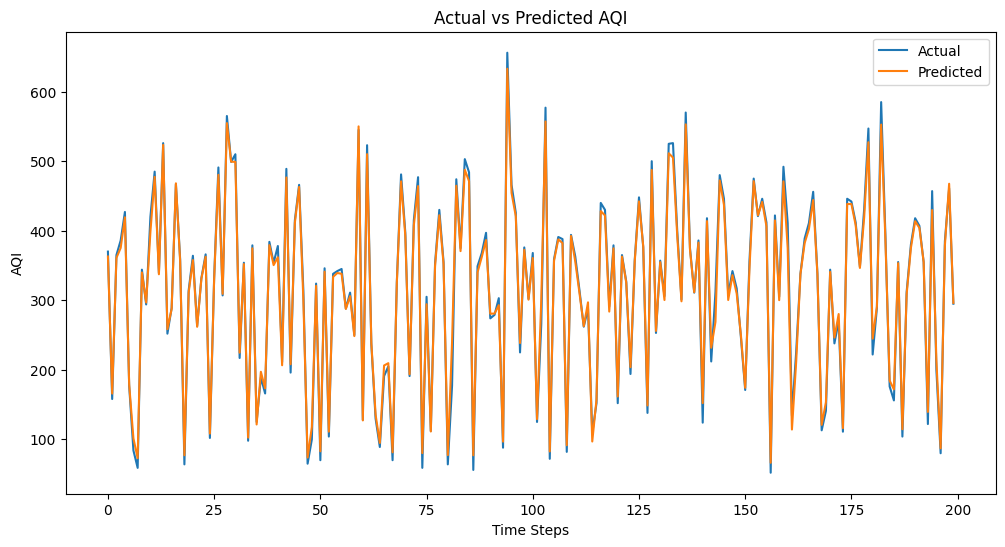

In [29]:
# Plot actual vs predicted for a sample of the test data
import matplotlib.pyplot as plt

sample_size = 200
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:sample_size], label='Actual')
plt.plot(predictions[:sample_size], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted AQI')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.show()

# LSTM for 6 hour time stamp


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the data
data = final_df.copy()

# Convert Datetime to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')
# data = data.sort_values('Datetime')  # Ensure data is sorted by date and time

# Set Datetime as index
data.set_index('Timestamp', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['AQI_calculated']])

# Create sequences for multi-step prediction
def create_sequences(data, seq_length, pred_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length - pred_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length:i+seq_length+pred_length, 0]  # Predicting only AQI
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 24  # Use 24 time steps as sequence length
prediction_length = 6  # Predict next 6 time steps
X, y = create_sequences(scaled_data, sequence_length, prediction_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(prediction_length)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions.reshape(-1, prediction_length)

# Inverse transform the actual target values
y_test_flat = y_test.reshape(-1, 1)
y_test_actual = scaler.inverse_transform(y_test_flat)
y_test_actual = y_test_actual.reshape(-1, prediction_length)

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test_actual)**2))
print(f"Root Mean Square Error: {rmse}")


Epoch 1/100
876/876 [==============================] - 12s 10ms/step - loss: 0.0104 - val_loss: 0.0018
Epoch 2/100
876/876 [==============================] - 8s 10ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 3/100
876/876 [==============================] - 8s 10ms/step - loss: 0.0021 - val_loss: 9.7378e-04
Epoch 4/100
876/876 [==============================] - 8s 10ms/step - loss: 0.0018 - val_loss: 8.9400e-04
Epoch 5/100
876/876 [==============================] - 8s 9ms/step - loss: 0.0017 - val_loss: 7.4967e-04
Epoch 6/100
876/876 [==============================] - 8s 10ms/step - loss: 0.0016 - val_loss: 8.1630e-04
Epoch 7/100
876/876 [==============================] - 8s 10ms/step - loss: 0.0016 - val_loss: 7.0715e-04
Epoch 8/100
876/876 [==============================] - 8s 10ms/step - loss: 0.0015 - val_loss: 6.4233e-04
Epoch 9/100
876/876 [==============================] - 9s 10ms/step - loss: 0.0015 - val_loss: 6.3371e-04
Epoch 10/100
876/876 [==============================] 

In [48]:
msa = np.mean((predictions - y_test_actual)**2)
msa

279.997125865098

In [59]:
vector = np.vectorize(np.int_)
pred = vector(predictions)
pred

array([[261, 261, 261, 261, 261, 261],
       [514, 514, 513, 513, 512, 511],
       [547, 545, 543, 542, 541, 539],
       ...,
       [248, 249, 249, 250, 251, 251],
       [370, 371, 371, 371, 372, 372],
       [414, 415, 415, 416, 416, 416]])

In [60]:
y_test_actual

array([[248., 244., 242., 239., 238., 238.],
       [517., 516., 520., 519., 517., 517.],
       [550., 550., 549., 546., 541., 541.],
       ...,
       [230., 239., 248., 260., 269., 263.],
       [368., 369., 370., 371., 371., 371.],
       [409., 407., 405., 405., 406., 407.]])

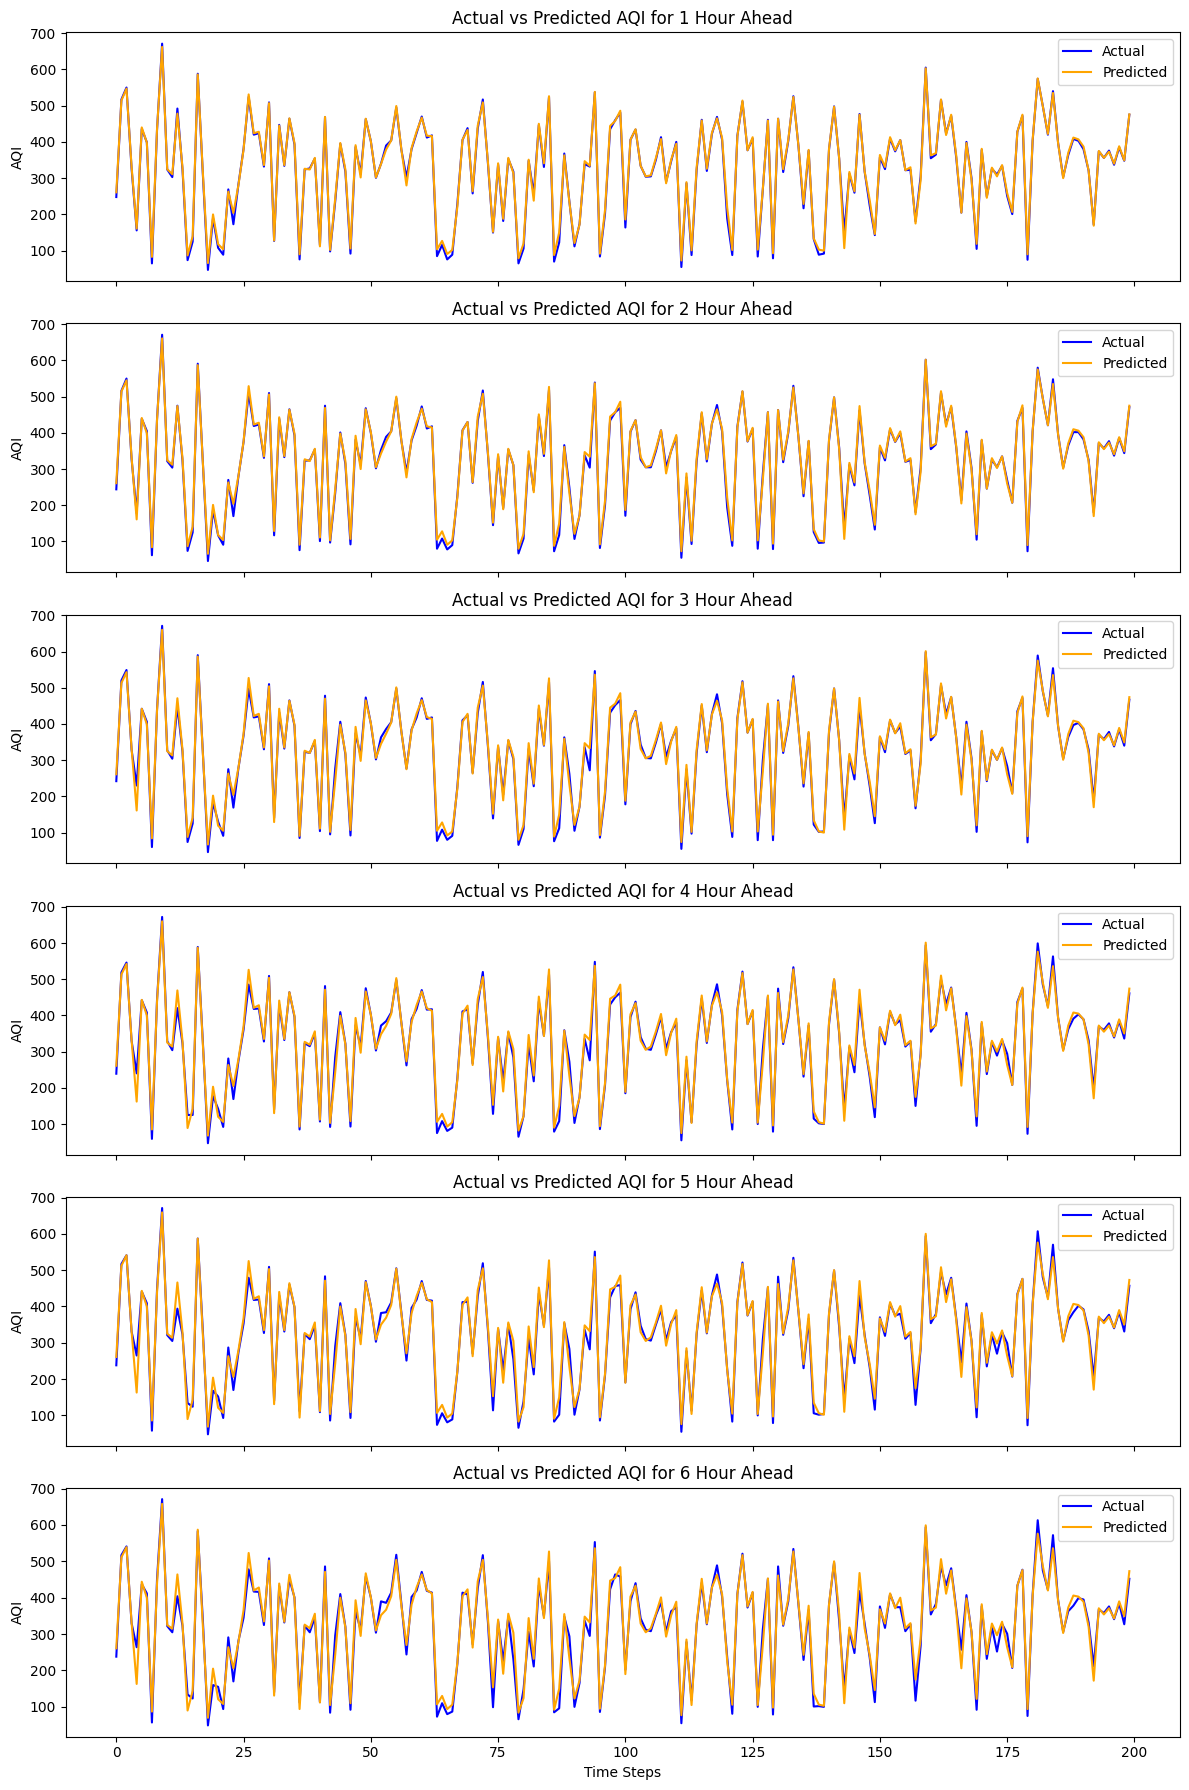

In [61]:
# Plot actual vs predicted for each prediction time step
import matplotlib.pyplot as plt

sample_size = 200
fig, axes = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

for i in range(6):
    axes[i].plot(y_test_actual[:sample_size, i], label='Actual', color='blue')
    axes[i].plot(pred[:sample_size, i], label='Predicted', color='orange')
    axes[i].set_title(f'Actual vs Predicted AQI for {i+1} Hour Ahead')
    axes[i].set_ylabel('AQI')
    axes[i].legend()

axes[-1].set_xlabel('Time Steps')

plt.tight_layout()
plt.show()


###################################

# Create Sequence

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("D:\Coding\Machine Learning\AQI\Imputed_Data\Alipur_imputed_Data.csv")

# Convert Datetime to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')
# data = data.sort_values('Datetime')  # Ensure data is sorted by date and time

# Set Datetime as index
data.set_index('Timestamp', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['AQI_calculated']])

# Create sequences
def create_sequences(data, seq_length, pred_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length - pred_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length:i + seq_length + pred_length, 0]  # Assuming AQI is the first column
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Use 24 time steps as sequence length (assuming hourly data)
sequence_length = 24
prediction_length = 6
X, y = create_sequences(scaled_data, sequence_length, prediction_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN

In [64]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(prediction_length)
])

cnn_model.compile(optimizer='adam', loss='mse')

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the CNN model
cnn_loss = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Loss: {cnn_loss}")

# Make predictions with the CNN model
cnn_predictions = cnn_model.predict(X_test)
cnn_predictions = scaler.inverse_transform(np.hstack((cnn_predictions, np.zeros((cnn_predictions.shape[0], X.shape[2]-1)))))[:,:prediction_length]




Epoch 1/50
876/876 [==============================] - 2s 2ms/step - loss: 0.0089 - val_loss: 0.0011
Epoch 2/50
876/876 [==============================] - 2s 2ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 3/50
876/876 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 8.2619e-04
Epoch 4/50
876/876 [==============================] - 2s 2ms/step - loss: 0.0018 - val_loss: 8.7334e-04
Epoch 5/50
876/876 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 9.3049e-04
Epoch 6/50
876/876 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 7.7510e-04
Epoch 7/50
876/876 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 7.4685e-04
Epoch 8/50
876/876 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 9/50
876/876 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 7.5530e-04
Epoch 10/50
876/876 [==============================] - 2s 2ms/step - loss:

# RNN

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the RNN model
rnn_model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(prediction_length)
])

rnn_model.compile(optimizer='adam', loss='mse')

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the RNN model
rnn_loss = rnn_model.evaluate(X_test, y_test)
print(f"RNN Test Loss: {rnn_loss}")

# Make predictions with the RNN model
rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(np.hstack((rnn_predictions, np.zeros((rnn_predictions.shape[0], X.shape[2]-1)))))[:, :prediction_length]


Epoch 1/50
876/876 [==============================] - 12s 10ms/step - loss: 0.0115 - val_loss: 0.0015
Epoch 2/50
876/876 [==============================] - 8s 10ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 3/50
876/876 [==============================] - 8s 10ms/step - loss: 0.0021 - val_loss: 9.4286e-04
Epoch 4/50
876/876 [==============================] - 8s 10ms/step - loss: 0.0017 - val_loss: 8.6292e-04
Epoch 5/50
876/876 [==============================] - 8s 10ms/step - loss: 0.0016 - val_loss: 8.0753e-04
Epoch 6/50
876/876 [==============================] - 8s 10ms/step - loss: 0.0015 - val_loss: 7.0373e-04
Epoch 7/50
876/876 [==============================] - 8s 9ms/step - loss: 0.0015 - val_loss: 7.6218e-04
Epoch 8/50
876/876 [==============================] - 9s 10ms/step - loss: 0.0014 - val_loss: 6.5018e-04
Epoch 9/50
876/876 [==============================] - 9s 10ms/step - loss: 0.0014 - val_loss: 7.4834e-04
Epoch 10/50
876/876 [==============================] - 9s 11ms/

# CNN RNN

In [73]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Combined CNN-RNN model
cnn_rnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, X.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(prediction_length)
])

cnn_rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = cnn_rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the combined CNN-RNN model
cnn_rnn_loss = cnn_rnn_model.evaluate(X_test, y_test)
print(f"Combined CNN-RNN Test Loss: {cnn_rnn_loss}")

# Make predictions with the combined CNN-RNN model
cnn_rnn_predictions = cnn_rnn_model.predict(X_test)
cnn_rnn_predictions = scaler.inverse_transform(np.hstack((cnn_rnn_predictions, np.zeros((cnn_rnn_predictions.shape[0], X.shape[2]-1)))))[:, :prediction_length]


Epoch 1/100
876/876 [==============================] - 8s 6ms/step - loss: 0.0119 - val_loss: 0.0020
Epoch 2/100
876/876 [==============================] - 5s 6ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/100
876/876 [==============================] - 6s 6ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 4/100
876/876 [==============================] - 5s 6ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 5/100
876/876 [==============================] - 5s 6ms/step - loss: 0.0017 - val_loss: 8.7693e-04
Epoch 6/100
876/876 [==============================] - 6s 6ms/step - loss: 0.0017 - val_loss: 8.8796e-04
Epoch 7/100
876/876 [==============================] - 6s 6ms/step - loss: 0.0016 - val_loss: 9.2361e-04
Epoch 8/100
876/876 [==============================] - 5s 6ms/step - loss: 0.0016 - val_loss: 7.8384e-04
Epoch 9/100
876/876 [==============================] - 5s 6ms/step - loss: 0.0015 - val_loss: 8.2193e-04
Epoch 10/100
876/876 [==============================] - 5s 6ms/step - l

In [67]:
# Calculate RMSE
cnn_rmse = np.sqrt(np.mean((cnn_predictions - y_test_actual)**2))
print(f"CNN Root Mean Square Error: {cnn_rmse}")

CNN Root Mean Square Error: 20.043622032525416


In [68]:
# Calculate RMSE
rnn_rmse = np.sqrt(np.mean((rnn_predictions - y_test_actual)**2))
print(f"RNN Root Mean Square Error: {rnn_rmse}")

RNN Root Mean Square Error: 17.007831866415646


In [74]:
# Calculate RMSE
c_rnn_rmse = np.sqrt(np.mean((cnn_rnn_predictions - y_test_actual)**2))
print(f"CNN-RNN Root Mean Square Error: {c_rnn_rmse}")

CNN-RNN Root Mean Square Error: 18.99323635528478


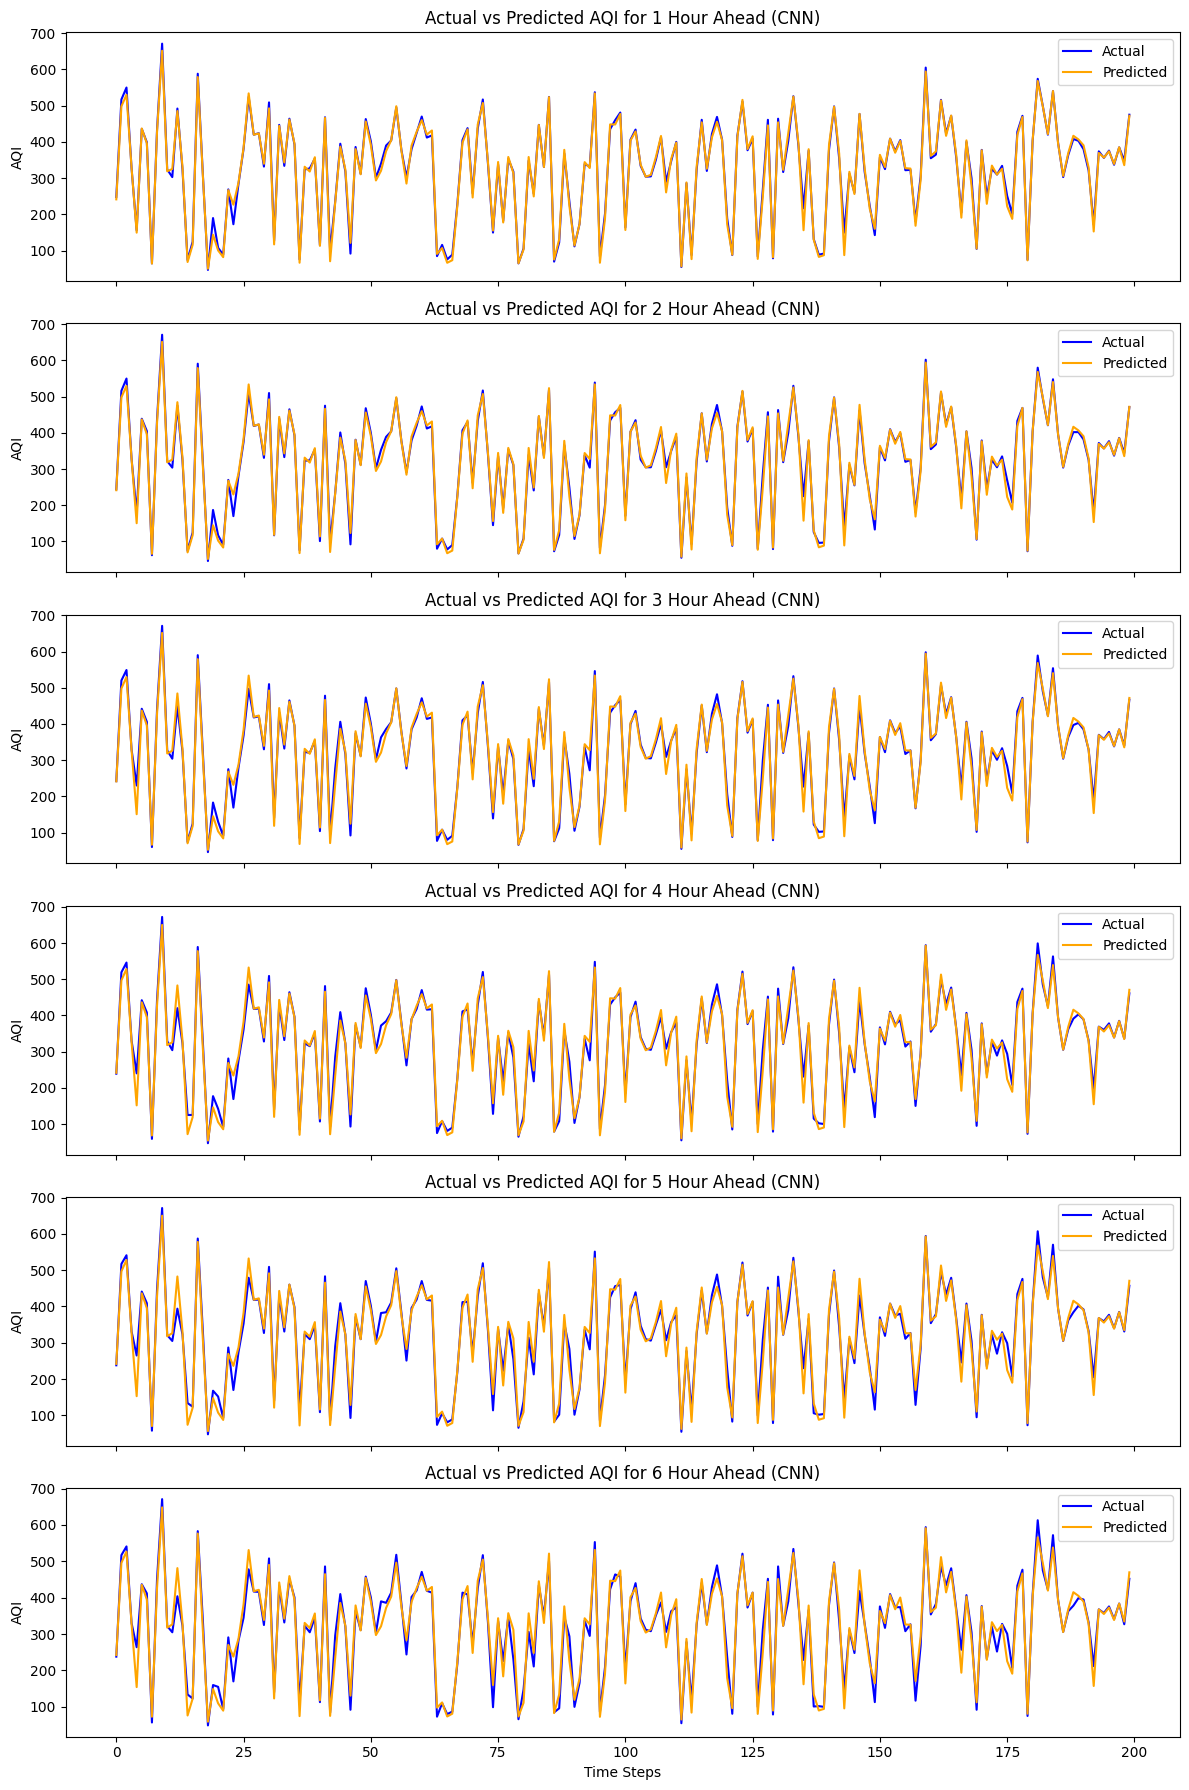

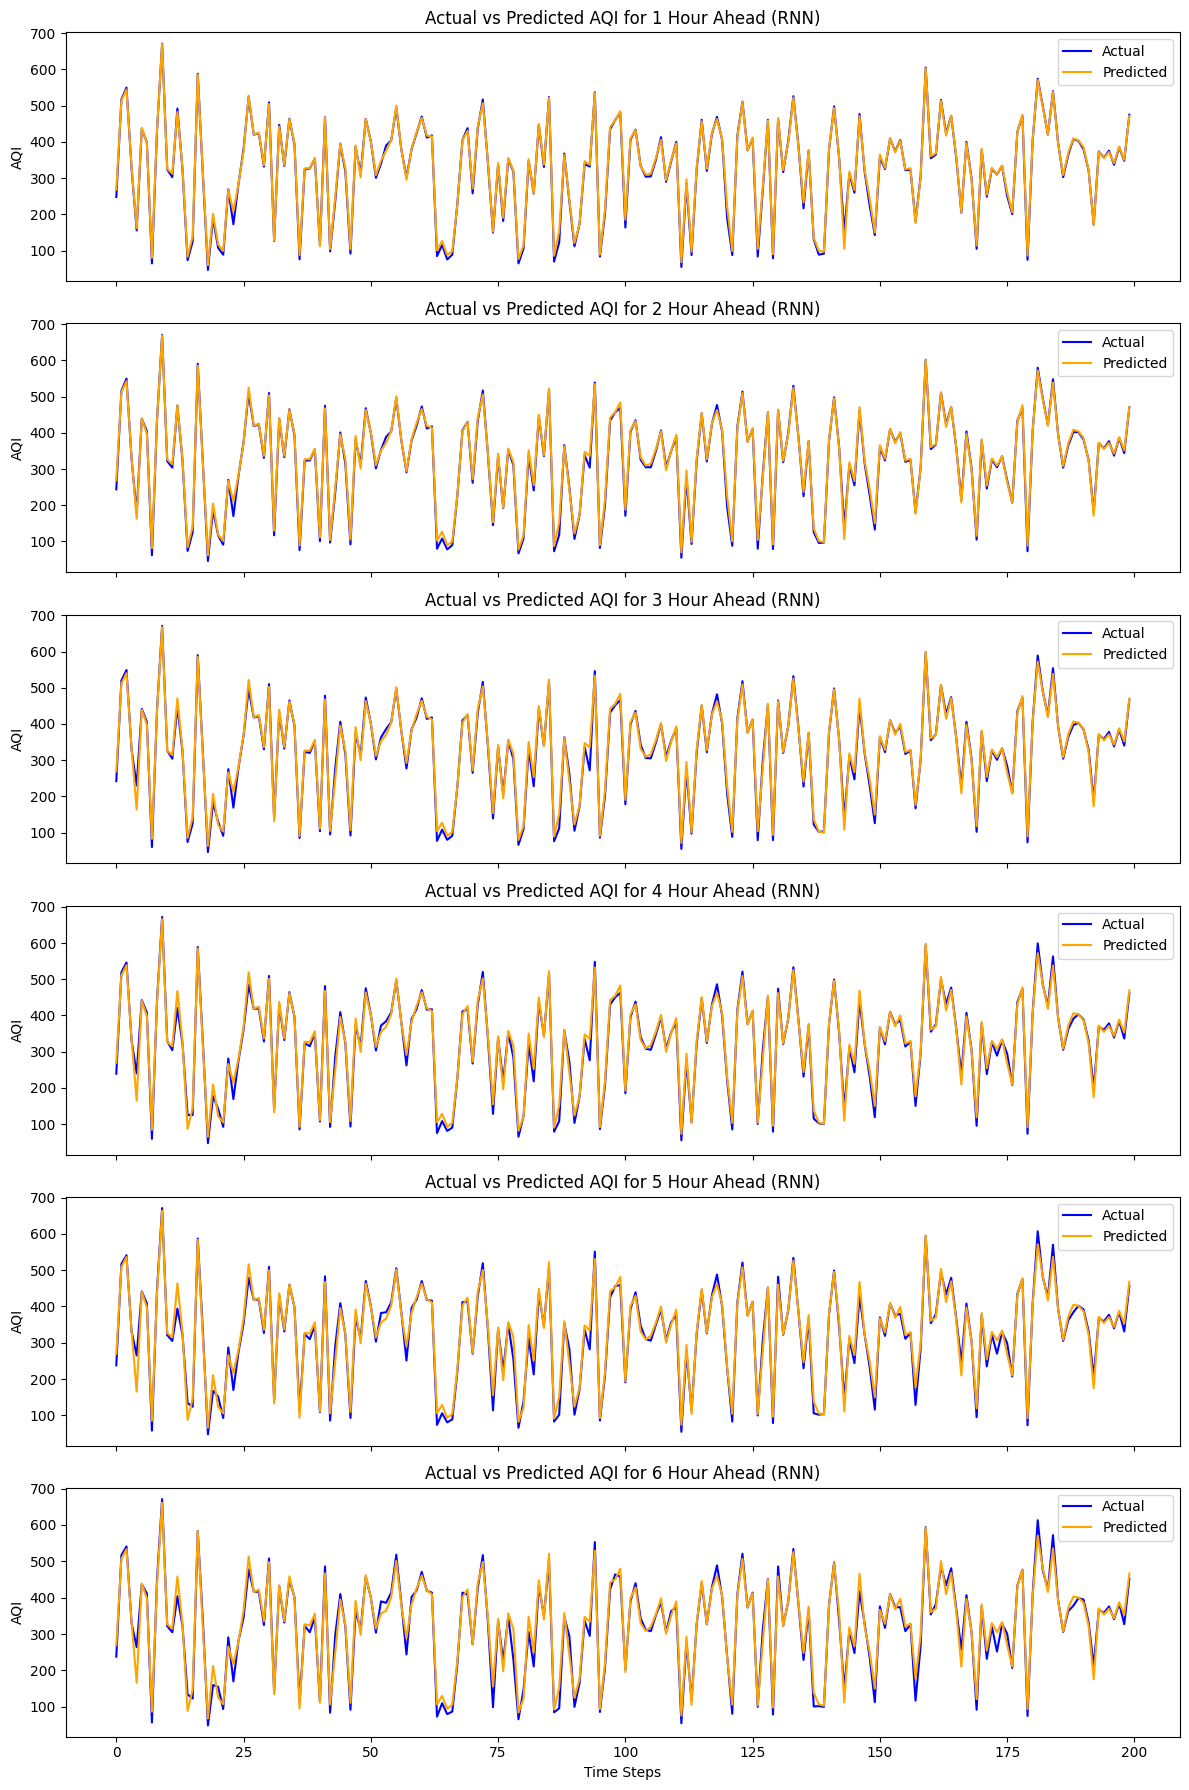

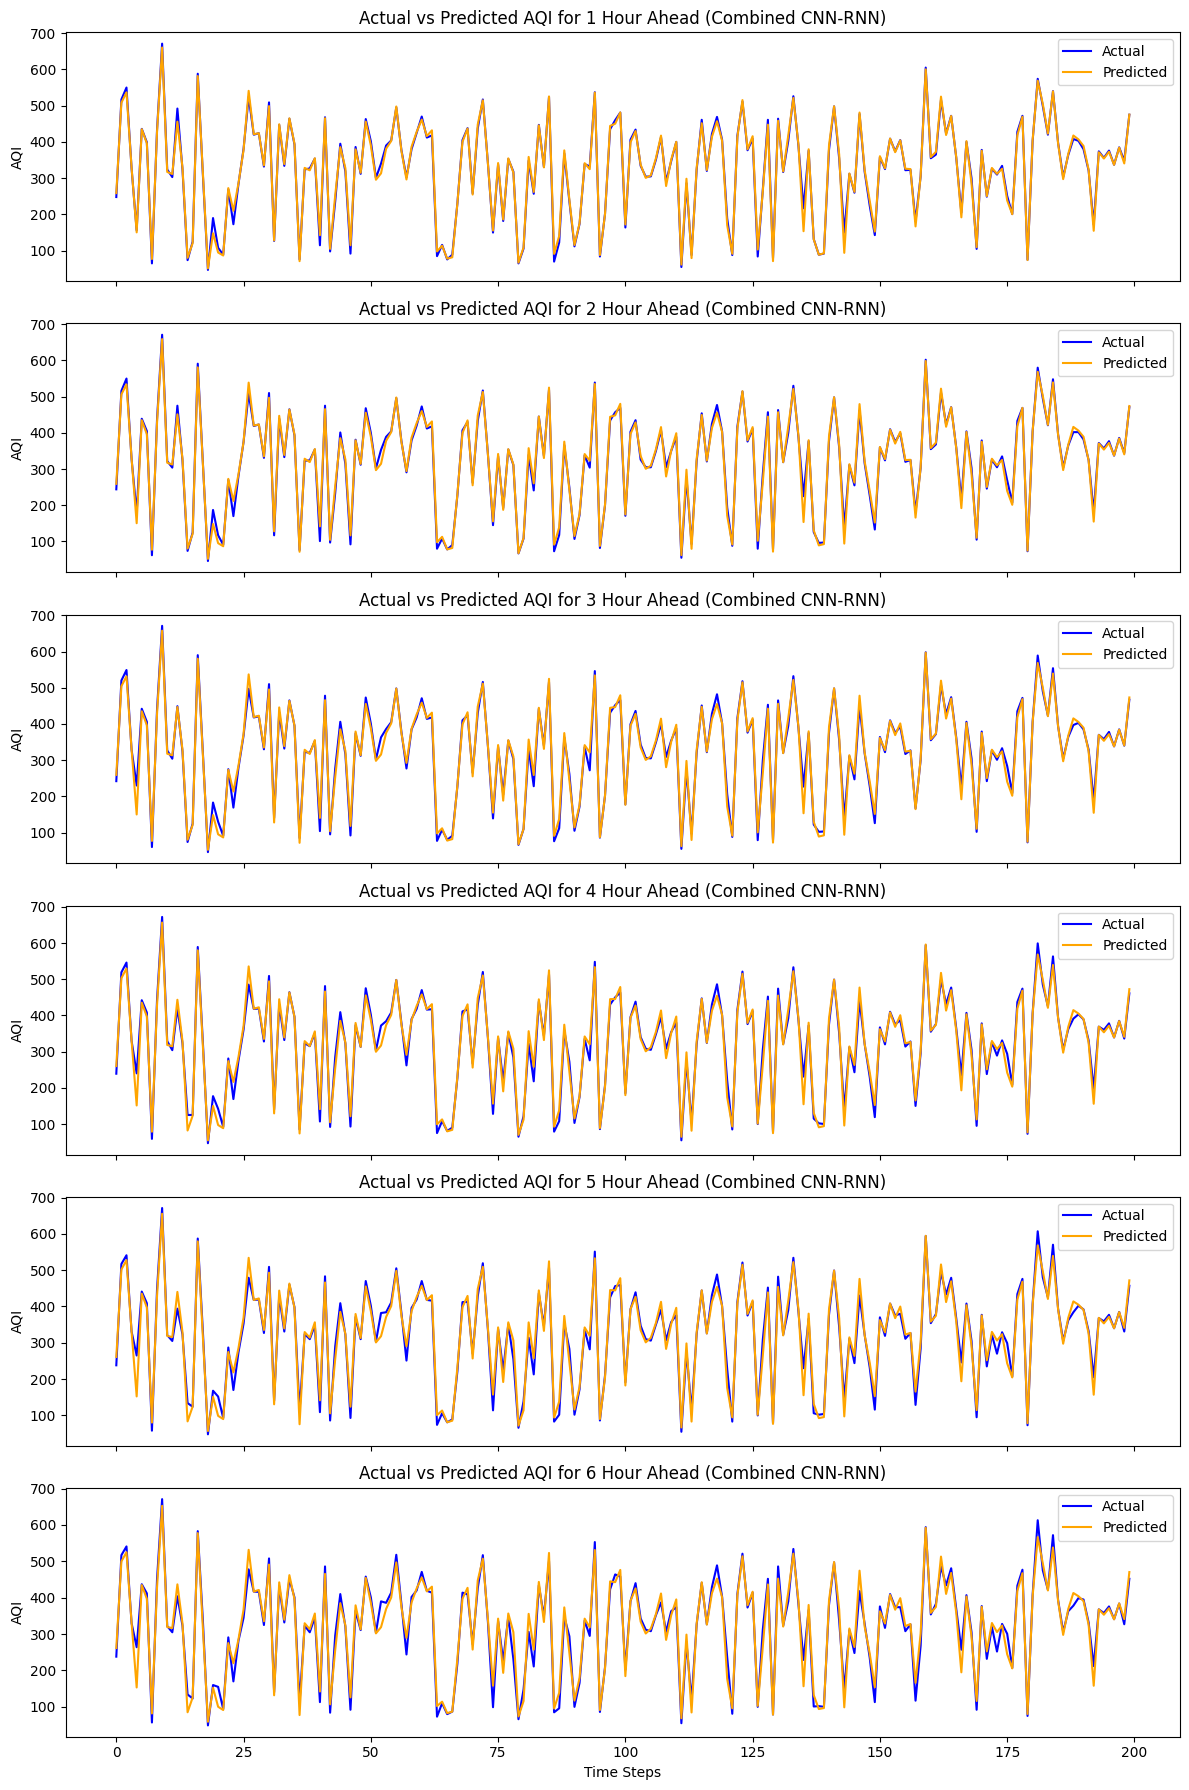

In [75]:
import matplotlib.pyplot as plt

def plot_predictions(y_test_actual, predictions, model_name):
    sample_size = 200  # Number of data points to plot
    fig, axes = plt.subplots(prediction_length, 1, figsize=(12, 18), sharex=True)

    for i in range(prediction_length):
        axes[i].plot(y_test_actual[:sample_size, i], label='Actual', color='blue')
        axes[i].plot(predictions[:sample_size, i], label='Predicted', color='orange')
        axes[i].set_title(f'Actual vs Predicted AQI for {i+1} Hour Ahead ({model_name})')
        axes[i].set_ylabel('AQI')
        axes[i].legend()

    axes[-1].set_xlabel('Time Steps')
    plt.tight_layout()
    plt.show()

# Get actual values for plotting
y_test_actual = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], X.shape[2]-1)))))[:, :prediction_length]

# Plot for CNN
plot_predictions(y_test_actual, cnn_predictions, 'CNN')

# Plot for RNN
plot_predictions(y_test_actual, rnn_predictions, 'RNN')

# Plot for Combined CNN-RNN
plot_predictions(y_test_actual, cnn_rnn_predictions, 'Combined CNN-RNN')
